# Entendimiento de Datos
En este cuaderno revisaremos dos aspectos grandes del entendimiento de datos: el perfilamiento y la calidad de los datos. Adicionalmente, se dan una serie de funciones para facilitar la manipulación de los datos.
* Inicio
    * Carga
    * Manipulación Básica

* Perfilamiento de Datos
    * Exploración
    * Visualización

* Calidad de Datos:
  * Completitud
  * Duplicados
  * Estandarización

* Resumenes automáticos para el entendimiento

Para la limpieza de los datos utilizaremos la libreria de **Pandas** (https://pandas.pydata.org/) y para la visualización de los datos, usaremos: **Seaborn**(https://seaborn.pydata.org/) y **Matplotlib** (https://matplotlib.org/).

## Los Datos
Trabajaremos con una base de datos de accidentes de BiciAlpes.

La base de datos original, la pueden encontrar aquí: **

# 1. Inicio

## 1.1 Carga

### 1.1.1 *Limpieza y lemantización*

In [27]:
# Uninstall numba, pandas_profiling and visions to clear any existing installation
!pip uninstall numba -y
!pip uninstall pandas_profiling -y
!pip uninstall visions -y

# Install the necessary modules
!pip install numba==0.58.1
!pip install ydata-profiling
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Plotly
!pip install plotly
import plotly.express as px

#Limpieza de datos

!pip install spacy
!python -m spacy download es_core_news_sm
%pip install nbformat

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import unicodedata

# Descargar e inicializar spaCy en español
import os
if not os.path.exists(spacy.util.get_package_path("es_core_news_sm")):
    spacy.cli.download("es_core_news_sm")

nlp = spacy.load("es_core_news_sm", disable=["ner", "textcat"])

Found existing installation: visions 0.7.6
Uninstalling visions-0.7.6:
  Successfully uninstalled visions-0.7.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "/Users/daniel/BI/Proyecto1/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
        File "/Users/daniel/BI/Proyecto1/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/daniel/BI/Proyecto1/venv/lib/python3.12/site-packa

[nltk_data] Downloading package punkt to /Users/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Ubicación de la base de datos
db_location = 'fake_news_spanish.csv'

In [29]:
# Cargar los datos
df = pd.read_csv(db_location, sep=';', encoding = "utf-8")

In [30]:
# Dimensiones de los datos
df.shape

(57063, 5)

In [31]:
# Ver los datos
display(df.sample(5)) # Muestra

,ID,Label,Titulo,Descripcion,Fecha
40153,ID,0,Torra se querella contra Martina Velarde por a...,Torra y compañía dicen que tenemos un gen meno...,04/12/2018
38869,ID,1,Esperanza Aguirre niega que ordenara espiar a ...,La Audiencia Provincial de Madrid ha reanudado...,11/02/2019
52222,ID,0,Tres mujeres dan la sorpresa en la jornada ele...,"Cuca Gamarra (UPN), Maddalen Iriarte (Izquierd...",13/07/2020
8542,ID,1,"ERC, molesto con el PSOE por dar por hecho ya ...",Sánchez aseguró que el pacto va a estar siempr...,05/12/2019
9977,ID,1,"Del 'Pablo, tenemos 12 días para ganar' de Gab...",Repasamos algunos de los momentos más sonados ...,22/04/2021


Eliminación de la columna ID porque todos las filas lo tenián con el valor 'ID'

In [32]:
df1 = df.drop("ID", axis = 1)

Revisamos cuantos valores nulos hay por columna

In [33]:
valores_nulos = df1.isnull().sum()
print(valores_nulos)

Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64


Como en titulo hay 16 valores nulos, que es una cantida mínima comparado con la cantidad de elementos en el dataset. Los eliminamos

In [34]:
df2 = df1.dropna()

Vamos ahora a revisar si hay elementos duplicados en la columna titulo

In [35]:
duplicados_titulo = df2['Titulo'].duplicated().sum()
print(f"Duplicados según titulo: {duplicados_titulo}")

Duplicados según titulo: 5443


In [36]:
valores_duplicados = df2[df2.duplicated(keep=False)]
valores_duplicados_ordenados = valores_duplicados.sort_values(by=df2.columns.tolist())
print(valores_duplicados_ordenados)

       Label                                             Titulo  \
24343      0  El Nueva Canarias cierra filas con Rita Maestr...   
29842      0  El Nueva Canarias cierra filas con Rita Maestr...   
1743       0  Escándalo de corrupción salpica a líderes sind...   
2981       0  Escándalo de corrupción salpica a líderes sind...   
18253      0  Escándalo de corrupción salpica a líderes sind...   
...      ...                                                ...   
9206       1  ¿Por qué las energías verdes están causando un...   
28272      1  ¿Qué son las políticas activas de empleo y por...   
37769      1  ¿Qué son las políticas activas de empleo y por...   
29781      1  Àngels Barceló: 'Los demócratas somos muchos más'   
35301      1  Àngels Barceló: 'Los demócratas somos muchos más'   

                                             Descripcion       Fecha  
24343  El Comité Federal termina con una votación uná...  10/06/2023  
29842  El Comité Federal termina con una votación uná

Después de analizar las filas repetidas y corroborar que el "label" es el mismo y que no se trataba de la misma noticia pero con una descripción diferente o algún diferenciador. Procedemos a eliminarlas

In [37]:
df3 = df2.drop_duplicates(subset = ['Titulo'])

In [38]:
duplicados_titulo = df3['Titulo'].duplicated().sum()
print(f"Duplicados según titulo: {duplicados_titulo}")

Duplicados según titulo: 0


Ahora vamos procesar y limpíar el texto, para poder tener una mejor deteción de patrones

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

def limpiar_texto(texto):
    texto = texto.lower()
    tokens = word_tokenize(texto, language='spanish')

    stop_words = set(stopwords.words('spanish'))
    palabras_filtradas = [palabra for palabra in tokens if palabra not in stop_words]

    texto_limpio = ' '.join(palabras_filtradas)
    return texto_limpio


df3['Titulo'] = df3["Titulo"].apply(limpiar_texto)
df3['Descripcion'] = df3["Descripcion"].apply(limpiar_texto)

display(df3.head(5)) # Primeras Filas


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/var/folders/tc/l_q_xn4x67qfwl2nz5zq17700000gn/T/ipykernel_13419/4246177543.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tc/l_q_xn4x67qfwl2nz5zq17700000gn/T/ipykernel_13419/4246177543.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Label,Titulo,Descripcion,Fecha
0,1,'the guardian ' va sánchez : 'europa necesita ...,diario británico publicó pasado jueves editori...,02/06/2023
1,0,revelan gobierno negocio liberación mireles ca...,revelan gobierno negocio liberación mireles ca...,01/10/2023
2,1,'ahora nunca ' joan fuster estatuto valenciano...,valencianismo convoca castelló fiesta grande c...,25/04/2022
3,1,"iglesias alienta yolanda díaz , erc eh bildu n...","política , igual negociar empresarios , negoci...",03/01/2022
4,0,puigdemont : 'no ninguna tragedia repetición e...,"entrevista punt avui , líder jxcat desdramatiz...",09/03/2018


In [40]:
def lematizar_sin_tildes(texts):
    docs = nlp.pipe(texts, batch_size=500)
    textos_lematizados = [" ".join([token.lemma_ for token in doc if not token.is_punct])
                         for doc in docs]
    return [unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
            for texto in textos_lematizados]

df4 = df3.copy()
df4['Titulo'] = lematizar_sin_tildes(df4['Titulo'])
df4['Descripcion'] = lematizar_sin_tildes(df4['Descripcion'])

In [41]:
display(df4.head(5)) # Primeras Filas

,Label,Titulo,Descripcion,Fecha
0,1,the guardian ir sanchez europa necesitar apues...,diario britanico publicar pasado jueves editor...,02/06/2023
1,0,revelar gobierno negocio liberacion mirel camb...,revelar gobierno negocio liberacion mirel camb...,01/10/2023
2,1,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castellar fiesta grande ...,25/04/2022
3,1,iglesia alentar yolanda diaz erc eh bildu nego...,politica igual negociar empresario negociar gr...,03/01/2022
4,0,puigdemont no ninguno tragedia repeticion elec...,entrevista punt avui lider jxcat desdramatizad...,09/03/2018


## 1.2 Manipulación Básica

En esta parte del Cuaderno la idea es que se familarice con algunos comandos que van a permitir manipular mejor los datos y avanzar en la comprensión de los mismos, muy de la mano del diccionario de datos.

In [42]:
df4.dtypes

Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

In [43]:
# Resumen de las principales estadísticas de las variables numéricas
df4['Label'].describe()

count    51604.000000
mean         0.587571
std          0.492276
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64

#### 1.2.1 Datos de Fechas

In [44]:
# la columna Fecha deberia ser fecha pero es object
df4.Fecha.tail(10)

57050    17/01/2020
57051    19/01/2019
57053    07/05/2018
57055    12/03/2023
57056    21/10/2018
57057    23/12/2021
57058    08/06/2021
57059    08/09/2020
57060    12/07/2018
57061    13/02/2022
Name: Fecha, dtype: object

In [45]:
df5 = df4.copy()

df5['Fecha'] = pd.to_datetime(df5.Fecha, dayfirst= True, errors = 'coerce')
df5['Fecha'].tail(10)

57050   2020-01-17
57051   2019-01-19
57053   2018-05-07
57055   2023-03-12
57056   2018-10-21
57057   2021-12-23
57058   2021-06-08
57059   2020-09-08
57060   2018-07-12
57061   2022-02-13
Name: Fecha, dtype: datetime64[ns]

In [46]:
print(df5["Fecha"].isna().sum())

0


# 2. Vectorización del texto

In [47]:
# Verificar si hay NaN en columnas de texto despues de la manipulacion de fechas
print("NaN en Titulo:", df5["Titulo"].isna().sum())
print("NaN en Descripcion:", df5["Descripcion"].isna().sum())

# Eliminar las filas donde hay NaN en las columnas de texto
df5 = df5.dropna(subset=["Titulo", "Descripcion"])

# Verificar que no haya mas NaN
print("NaN en Titulo despues de eliminar:", df5["Titulo"].isna().sum())
print("NaN en Descripcion despues de eliminar:", df5["Descripcion"].isna().sum())


NaN en Titulo: 0
NaN en Descripcion: 0
NaN en Titulo despues de eliminar: 0
NaN en Descripcion despues de eliminar: 0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]{2,}\b", max_features=5000)
X_tfidf = vectorizer.fit_transform(df5["Titulo"] + " " + df5["Descripcion"])

# Convertir a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

   aba  abajo  abalo  abandona  abandonado  abandonar  abandono  abascal  abc  \
0  0.0    0.0    0.0       0.0         0.0        0.0       0.0      0.0  0.0   
1  0.0    0.0    0.0       0.0         0.0        0.0       0.0      0.0  0.0   
2  0.0    0.0    0.0       0.0         0.0        0.0       0.0      0.0  0.0   
3  0.0    0.0    0.0       0.0         0.0        0.0       0.0      0.0  0.0   
4  0.0    0.0    0.0       0.0         0.0        0.0       0.0      0.0  0.0   

   abdicacion  abertzale  abiertamente  ...  zapatero  zaplan  zaplana  \
0         0.0        0.0           0.0  ...       0.0     0.0      0.0   
1         0.0        0.0           0.0  ...       0.0     0.0      0.0   
2         0.0        0.0           0.0  ...       0.0     0.0      0.0   
3         0.0        0.0           0.0  ...       0.0     0.0      0.0   
4         0.0        0.0           0.0  ...       0.0     0.0      0.0   

   zaragoza  zaragozar  zarzalejos  zarzuela  zavala  zendal  zerolo

# 3. Visualización de los datos

### 2.4.1 Diagramas de Temporales

Distribución de las noticias según si son verdaderas o falsas

In [49]:
conteo_clases = df5["Label"].value_counts()

mapeo_etiquetas = {0: "Noticias Falsas", 1: "Noticias Verdaderas"}
fig = px.pie(names=conteo_clases.index.map(mapeo_etiquetas), values=conteo_clases.values,
             title=f'Distribución de noticias falsas y verdaderas ({df.shape[0]} noticias)')

fig

Dado que la distribución entre noticias falsas y verdaderas es relativamente equilibrada, podemos trabajar con los datos sin necesidad de ajustar el balance de clases.

---
Analisis para identificar si la fecha esta directamente relacionada con la veracidad de una noticia

Rango de fechas: 2016-01-02 00:00:00 a 2024-12-28 00:00:00


<Figure size 1000x500 with 0 Axes>

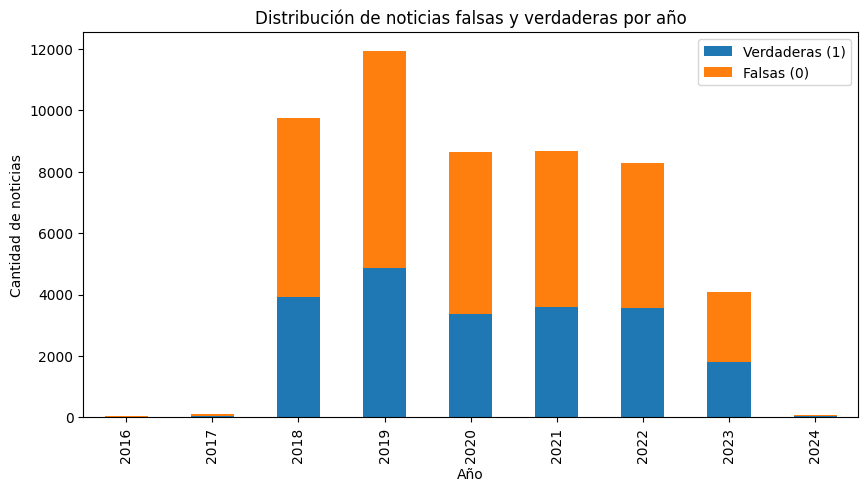

Correlación entre año y etiqueta de noticia: -0.023015782359151492


In [50]:
print("Rango de fechas:", df5["Fecha"].min(), "a", df5["Fecha"].max())


# Distribución de noticias falsas vs. verdaderas por año
plt.figure(figsize=(10,5))
df5.groupby([df5["Fecha"].dt.year, "Label"]).size().unstack().rename(columns={0: "Falsas", 1: "Verdaderas"}).plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Distribución de noticias falsas y verdaderas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de noticias")
plt.legend(["Verdaderas (1)", "Falsas (0)"])
plt.show()

# Análisis de correlación entre año y etiqueta de noticia
correlacion = df5["Fecha"].dt.year.corr(df["Label"])
print("Correlación entre año y etiqueta de noticia:", correlacion)

## 4. Reportes Automáticos para realizar el entendimiento de los datos

Para los reportes automáticos, se puede usar al herramienta de pandas profiling.


Para cada columna, genera las siguientes estadísticas, si son relevantes para el tipo de columna, se presentan en un informe HTML interactivo:

1. Inferencia de tipo: detecta los tipos de columnas en un dataframe.
2. Esenciales: tipo, valores únicos, valores faltantes.
3. Estadísticas de cuantiles como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartílico. Esta opción es bastante útil para identificar datos atípicos.
4. Estadísticas descriptivas como media, moda, desviación estándar, suma, desviación absoluta mediana, coeficiente de variación, curtosis, asimetría.
5. Valores más frecuentes.
6. Histogramas.
7. Correlaciones destacando variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall. Esto permite descubrir relaciones entre atributos.
8. Matriz de valores faltantes, recuento, mapa de calor y dendrograma de valores faltantes

Tomado de la librería oficial de pandas_profiling en [github](https://github.com/pandas-profiling/pandas-profiling)

Lo más importante al utilizar esta librería es recordar que lo fundamental son los análisis que hagamos sobre estos reportes.

In [51]:
import pandas_profiling

profiling =pandas_profiling.ProfileReport(df5)
profiling

Render HTML: 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]


In [52]:
profiling.to_file("Proyecto1_db_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 258.00it/s]


# Modelos

## Modelo basado en reglas (RIPPER)

Para clasificar noticias falsas utilizando un modelo basado en reglas, se escogio el algoritmo RIPPER (Repeated Incremental Pruning to Produce Error Reduction), ya que es una opción eficiente y escalable para conjuntos de datos grandes, como el de 60,000 registros. 

Algunas de sus principales ventajas son:  

- **Simplicidad y explicabilidad**: Genera reglas fácilmente interpretables, lo que permite comprender mejor los patrones asociados a las noticias falsas.  
- **Eficiencia en grandes volúmenes de datos**: Está diseñado para procesar grandes cantidades de información sin riesgo de sobreajuste.  
- **Manejo de datos desbalanceados**: Puede ajustar la cobertura de las reglas para reducir el sesgo hacia la clase mayoritaria, mejorando así la precisión en la clasificación.

### Imports

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%pip install wittgenstein
import wittgenstein as lw

Note: you may need to restart the kernel to use updated packages.


### Modelo

In [54]:

pca = PCA(n_components=100, random_state=42)
X_reduced = pca.fit_transform(tfidf_df)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, df5['Label'], test_size=0.2, random_state=42)

X_train_sample = X_train
y_train_sample = y_train

print(y_train_sample.value_counts())
pos_class = 1 if y_train_sample.value_counts().idxmax() == 1 else 0

# Entrenar modelo RIPPER
ripper_classifier = lw.RIPPER()
ripper_classifier.fit(X_train_sample, y_train_sample, pos_class=pos_class)

# Hacer predicciones
y_pred = ripper_classifier.predict(X_test)

Label
1    24137
0    17146
Name: count, dtype: int64


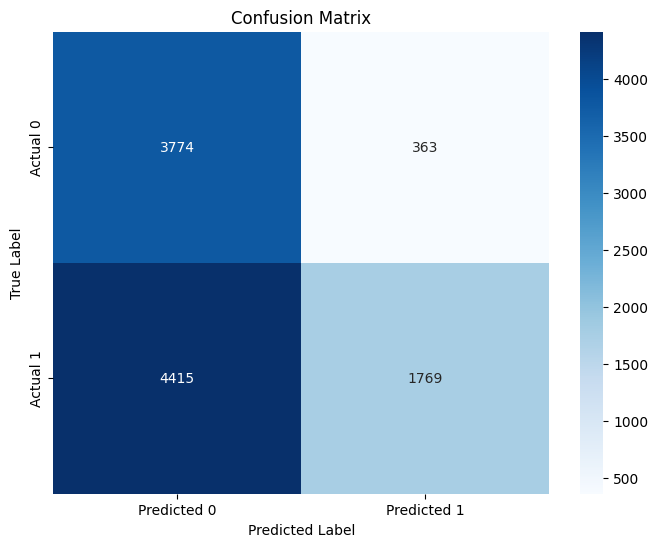

In [55]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
# Evaluar modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.91      0.61      4137
           1       0.83      0.29      0.43      6184

    accuracy                           0.54     10321
   macro avg       0.65      0.60      0.52     10321
weighted avg       0.68      0.54      0.50     10321



## Modelo Basado en Arboles de Decisión (XGBoost)

Note: you may need to restart the kernel to use updated packages.
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      4137
           1       0.87      0.99      0.92      6184

    accuracy                           0.90     10321
   macro avg       0.92      0.88      0.89     10321
weighted avg       0.91      0.90      0.90     10321



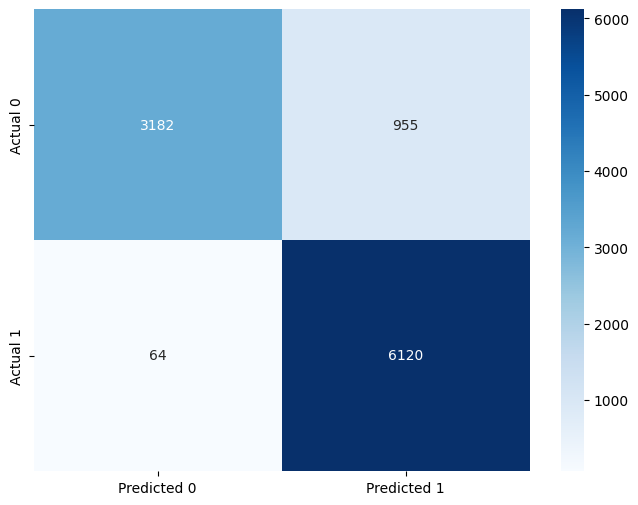

In [59]:
%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_df, df5['Label'], test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_test)


# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])


# Evaluar el modelo
print(classification_report(y_test, y_pred))